In [1]:
import random
import matplotlib.pyplot as plt
import regular_sudoku_different_sizes as rs
import pandas as pd

pygame 2.4.0 (SDL 2.26.4, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Targeted Algorithm Analysis:

#### We have used lists to store both the solved and unsolved puzzle board. This choice was made since the lists are easier to traverse and didn't need any overhead computation.

#### For solver, we are using the SAT solver with CNF rules. The sat solver works incredibly faster for sudoku since the rules of sudoku can be easily converted to CNF rules. One of the difficulty we faced is to integrate the sandwich rules into the SAT solver. As a workaround, we have different method which checks for sandwich rules after the SAT solver outputs the solved board.

## Runtime complexity Analysis

### The Big Omega analysis
#### The best case scenario for the solver is calculated by cumulating the best case scenario for most of the complex methods in the solver file.
#### validate_Sandwich : The Big Omega for the sandwich is same as the Big O of the sandwich since, for both worst and best cases the grid will be looped to calculate the sum. Hence, Big Omega is m*n where m is the number of rows and n is the number of columns
#### validate_thermos : The Big Omega for the thermos is x * y where x is the least possible length of the thermos and y is the number of thermos in the puzzle. In the best case scenario x is always 4 and y is always 2
#### solver(): The Big Omega for the solver method is combination of generating cnfs + solving the cnfs + adding the validations for thermos and sandwich. Hence the generation cnfs O((m) + (3*m) + (n)) where m is the row size and numbers are the numbers to be filled in the board. Here the best case scenario is same as the worst case since the cnf rules will iterate through the size and groups of the grid.
##### The second aspect is the solving of cnfs which will iterate through all the cnf rules added in the generation step.                                           i.e. S * (O((m) + (3*m) + (n))) where S is number of solutions. Here the best case scenario is generating an appropriate puzzle on first try thus number of solutions S = 1

##### The third aspect is the sandwich and thermos i.e. O(m*n) + O(x*y). For the best case scenario x * y is 8. Thus we can remove it since it's a constant. Omega((m * n) + 8) = Omega(m*n)

##### The best case scenario for all these sections can be written as
##### Omega (((m) + (3*m)+ (n)) + ((m) + (3*m)+ (n)) + (m*n))
##### i.e. 2 * ((m) + (3*m)+ (n)) + (m*n)
##### i.e. (m^2^*n) + (3*m*n) + (m*n^2^)
##### By removing all constants
##### = (m^2^*n) + (m*n) + (m*n^2^)

#### generate_puzzle(): In this method the solver code is called in a while loop until we get 1 solution for the generated puzzle. This method comprises of 2 parts. The first part is iterating through the board to remove number as per the set difficulty level. The 2nd part is solving the generated puzzle with the cnf rules and variant hints, to find a single solution
 ##### For the first part of removing numbers, the equation would be Omega(p * q) where p is the number of cells to empty and q is the number of iteration to find empty cell. For the best case scenario, q will be 1 i.e. we get non empty cells each time a cell is picked randomly. Thus Omega(p)
 #### For the second part of solver, the equation would be R*(((m) + (3*m)+ (n)) + ((m) + (3*m)+ (n)) + (m*n)) where R is the number of loops until 1 solution is found, m is the row size and n is the numbers to fill int he cell. For best case scenario, R = 1
##### i.e. Omega((m^2^*n) + (m*n) + (m*n^2^))

#### Combining both parts Omega((p) + ((m^2^*n) + (3*m*n) + (m*n^2^))). Since p is constant for each difficulty level, we can simplify this as
##### i.e. Omega((m^2^*n) + (m*n) + (m*n^2^))

### The Big Theta analysis:
#### Average case analysis for the solver is calculated similar to the Omega calculations.

#### validate_Sandwich : The Big Theta for the sandwich is same as the Big O of the sandwich since, for both worst and average cases the grid will be looped to calculate the sum. Hence, Big Theta is m*n where m is the number of rows and n is the number of columns
#### validate_thermos : The Big Theta for the thermos is x * y where x is the least possible length of the thermos and y is the number of thermos in the puzzle. In the average case scenario x is 6 or 7 i.e. (3/4)*SIZE  and y is always 2
#### solver(): The Big Theta for the solver method is combination of generating cnfs + solving the cnfs + adding the validations for thermos and sandwich. Hence the generation cnfs O((m) + (3*m) + (n)) where m is the row size and numbers are the numbers to be filled in the board. Here the average case scenario is same as the worst case since the cnf rules will iterate through the size and groups of the grid.
##### The second aspect is the solving of cnfs which will iterate through all the cnf rules added in the generation step.                                           i.e. S * (O((m) + (3*m) + (n))) where S is number of solutions. Here the average case scenario is generating an appropriate puzzle on first try thus number of solutions S = (m^2^) where m is the number of rows and m^2^ will be the number of total cells in the grid.

##### The third aspect is the sandwich and thermos i.e. O(m*n) + O(x*y). For the average case scenario x * y is ((3/4)*m) * 2 . Thus we can remove the constants in the expression. Omega((m * n) + ((3/4)*m) * 2) = Omega((m^2^)*n)

##### The average case scenario for all these sections can be written as            Omega (((m) + (3*m)+ (n)) + ((m^2^) * ((m) + (3*m)+ (n))) + ((m^2^)*n))
##### i.e.  ((m) + (3*m)+ (n)) + (m^3^ + (3*m^3^) + ((m^2^)* n)) + ((m^2^)*n)
##### Removing the constants
##### i.e. (m^3^) + ((m^2^)*n) + m + n

#### generate_puzzle(): In this method the solver code is called in a while loop until we get 1 solution for the generated puzzle. This method comprises 2 parts. The first part is iterating through the board to remove number as per the set difficulty level. The 2nd part is solving the generated puzzle with the cnf rules and variant hints, to find a single solution
 ##### For the first part of removing numbers, the equation would be Theta(p * q) where p is the number of cells to empty and q is the number of iteration to find empty cell. For the average case scenario, q will be p/2 i.e. we get non empty cells nearly half of the time. Thus Theta(p^2^)
 #### For the second part of solver, the equation would be R*(((m) + (3*m)+ (n)) + ((m) + (3*m)+ (n)) + (m*n)) where R is the number of loops until 1 solution is found, m is the row size and n is the numbers to fill int he cell. For average case scenario, R can be written as m^2^ where the solutions found can be, on an average the size of grid
##### i.e. Theta((m^2^) * ((m^2^*n) + (3*m*n) + (m*n^2^)))
##### i.e. ((m^4^)*n) + ((m^3^)*(n^2^)) + ((m^3^)*n)

#### Combining both parts Theta((p^2) + (((m^4)*n) + ((m^3)*(n^2)) + ((m^3)*n))). We can simplify this as
##### i.e. Theta((p^2^) + (((m^4^)*n) + ((m^3^)*(n^2^)) + ((m^3^)*n)))
##### i.e. Theta (((m^4^)*(p^2^)*n) + ((m^3^)*(p^2^)*(n^2^)) + ((m^3^)*(p^2^)*n))



#### The Big O analysis for the board is O(infinity) where the board may produce the puzzle boards infinitely.


## The run samples

#### This method runs the number of games specified times

In [2]:
def run_game(no_of_games):
    x_list = []
    y_list = []
    for i in range(0, no_of_games):
        SIZE = 9
        level = random.randint(1, 4)
        print('Difficulty level ', level)
        sudoku = rs.Sudoku(SIZE, level)
        x_list.append(i + 1)
        y_list.append(sudoku.total_iter)
    return x_list, y_list


#### For 10 games the Analysis is as shown

Difficulty level  2
valid and solved board, hidden to player
- - - - - - - - - - - - 
2 8 1  | 7 6 4  | 5 9 3
3 4 6  | 5 9 1  | 8 2 7
7 9 5  | 8 2 3  | 4 6 1
- - - - - - - - - - - - 
9 2 7  | 1 8 6  | 3 5 4
5 3 8  | 2 4 9  | 7 1 6
6 1 4  | 3 7 5  | 9 8 2
- - - - - - - - - - - - 
1 6 9  | 4 5 7  | 2 3 8
4 5 2  | 6 3 8  | 1 7 9
8 7 3  | 9 1 2  | 6 4 5
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  5
solutions remaining to be solved:  2
solutions remaining to be solved:  8
solutions remaining to be solved:  4
solutions remaining to be solved:  6
solutions remaining to be solved:  1
Difficulty level  4
---------Sandwich----------------
[17, 13, 11, 14, 16, 0, 7, 17, 31] [0, 20, 12, 6, 11, 4, 25, 23, 5]
-----------------------------------
valid and solved board, hidden to player
- - - - - - - - - - - - 
5 1 6  | 8 3 9  | 2 4 7
8 3 9  | 2 7 4  | 1 5 6
2 7 4  | 5 6 1  | 8 3 9
- - - - - - - - - - - - 
4 2 3  | 7 1 8  | 6 9 5
6 8 5  | 9 4 3  | 7 2 1
7 9 1  | 6 5 2  | 

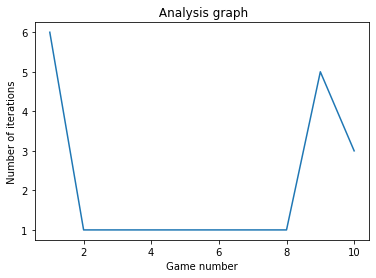

In [3]:
x_list, y_list = run_game(10)
plt.plot(x_list, y_list)
plt.xlabel(' Game number ')
plt.ylabel(' Number of iterations ')
plt.title(' Analysis graph')
plt.show()

In [4]:
x_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
y_list

[6, 1, 1, 1, 1, 1, 1, 1, 5, 3]

In [6]:
xy_df = pd.DataFrame(y_list, index= x_list )
xy_df

,0
1,6
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,5
10,3


In [7]:
xy_df.describe()

,0
count,10.000000
mean,2.100000
std,1.911951
min,1.000000
25%,1.000000
50%,1.000000
75%,2.500000
max,6.000000


#### For 50 games the Analysis is as shown

Difficulty level  1
valid and solved board, hidden to player
- - - - - - - - - - - - 
2 1 9  | 6 8 4  | 5 3 7
8 7 4  | 3 5 2  | 1 6 9
6 3 5  | 9 7 1  | 2 4 8
- - - - - - - - - - - - 
3 5 8  | 4 2 7  | 9 1 6
9 4 7  | 8 1 6  | 3 2 5
1 2 6  | 5 9 3  | 8 7 4
- - - - - - - - - - - - 
7 8 3  | 1 6 9  | 4 5 2
4 9 2  | 7 3 5  | 6 8 1
5 6 1  | 2 4 8  | 7 9 3
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  6
solutions remaining to be solved:  1
Difficulty level  2
valid and solved board, hidden to player
- - - - - - - - - - - - 
4 5 6  | 7 8 3  | 1 2 9
9 7 1  | 5 6 2  | 4 3 8
8 2 3  | 9 4 1  | 7 5 6
- - - - - - - - - - - - 
7 3 5  | 4 1 6  | 9 8 2
1 6 4  | 8 2 9  | 3 7 5
2 9 8  | 3 7 5  | 6 1 4
- - - - - - - - - - - - 
6 4 2  | 1 3 8  | 5 9 7
5 1 7  | 2 9 4  | 8 6 3
3 8 9  | 6 5 7  | 2 4 1
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  3
solutions remaining to be solved:  2
solutions remaining to be solved:  4
solutions remaining to be solved:

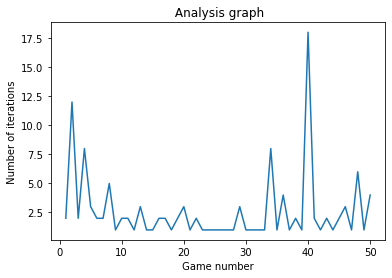

In [8]:
x_list, y_list = run_game(50)
plt.plot(x_list, y_list)
plt.xlabel(' Game number ')
plt.ylabel(' Number of iterations ')
plt.title(' Analysis graph')
plt.show()

In [9]:
x_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [10]:
y_list

[2,
 12,
 2,
 8,
 3,
 2,
 2,
 5,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 8,
 1,
 4,
 1,
 2,
 1,
 18,
 2,
 1,
 2,
 1,
 2,
 3,
 1,
 6,
 1,
 4]

In [11]:
xy_df = pd.DataFrame(y_list, index=x_list )
xy_df

,0
1,2
2,12
3,2
4,8
5,3
6,2
7,2
8,5
9,1
10,2


In [12]:
xy_df.describe()

,0
count,50.000000
mean,2.620000
std,3.096344
min,1.000000
25%,1.000000
50%,2.000000
75%,2.750000
max,18.000000


#### For 100 games the Analysis is as shown

Difficulty level  1
valid and solved board, hidden to player
- - - - - - - - - - - - 
2 6 8  | 5 1 9  | 3 4 7
9 1 7  | 8 4 3  | 6 2 5
3 4 5  | 7 2 6  | 8 1 9
- - - - - - - - - - - - 
6 7 2  | 1 9 4  | 5 8 3
5 3 4  | 6 7 8  | 2 9 1
1 8 9  | 2 3 5  | 4 7 6
- - - - - - - - - - - - 
8 9 6  | 4 5 7  | 1 3 2
7 5 1  | 3 8 2  | 9 6 4
4 2 3  | 9 6 1  | 7 5 8
- - - - - - - - - - - - 


Welcome to the Sudoku game!

solutions found:  6
solutions remaining to be solved:  1
Difficulty level  4
---------Sandwich----------------
[23, 12, 12, 20, 29, 0, 0, 9, 9] [4, 4, 10, 0, 3, 13, 0, 19, 13]
-----------------------------------
valid and solved board, hidden to player
- - - - - - - - - - - - 
9 8 6  | 3 4 2  | 1 5 7
4 2 3  | 1 7 5  | 9 6 8
1 5 7  | 9 6 8  | 4 3 2
- - - - - - - - - - - - 
7 3 9  | 6 2 4  | 8 1 5
6 1 8  | 7 5 3  | 2 4 9
5 4 2  | 8 9 1  | 6 7 3
- - - - - - - - - - - - 
2 9 1  | 4 3 7  | 5 8 6
8 7 5  | 2 1 6  | 3 9 4
3 6 4  | 5 8 9  | 7 2 1
- - - - - - - - - - - - 


Welcome to the Sudoku

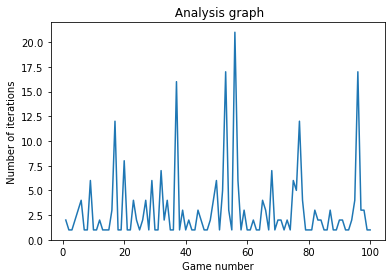

In [13]:
x_list, y_list = run_game(100)
plt.plot(x_list, y_list)
plt.xlabel(' Game number ')
plt.ylabel(' Number of iterations ')
plt.title(' Analysis graph')
plt.show()

In [14]:
x_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [15]:
y_list

[2,
 1,
 1,
 2,
 3,
 4,
 1,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 12,
 1,
 1,
 8,
 1,
 1,
 4,
 2,
 1,
 2,
 4,
 1,
 6,
 1,
 1,
 7,
 2,
 4,
 1,
 1,
 16,
 1,
 3,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 4,
 6,
 1,
 5,
 17,
 3,
 1,
 21,
 6,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 4,
 3,
 1,
 7,
 1,
 2,
 2,
 1,
 2,
 1,
 6,
 5,
 12,
 4,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 4,
 17,
 3,
 3,
 1,
 1]

In [16]:
xy_df = pd.DataFrame(y_list, index=x_list, )
xy_df

,0
1,2
2,1
3,1
4,2
5,3
...,...
96,17
97,3
98,3
99,1


In [17]:
xy_df.describe()

,0
count,100.000000
mean,3.050000
std,3.721016
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,21.000000
